# Homework 0
#### Simon Lee (simon.lee@epfl.ch) - SV MA1 Student - Winter 2022

### 00 - Optional homework

For this initial homework we will be working with a [dataset](https://github.com/fivethirtyeight/guns-data/blob/master/interactive_data.csv) available as a part of an interesting analysis of [gunshot deaths in the US](http://fivethirtyeight.com/features/gun-deaths/). The goal of this optional homework is to carefully go through the interactive visualization portrayed at the top of the aforementioned article, and use an IPython Notebook to reproduce the following claims made in the visualization:
- Nearly *two-thirds* of gun deaths are *suicides*.
- More than *85 percent* of suicide victims are *male*.
- Around *a third* of all gun deaths are *homicides*.
- Around *two-thirds* of homicide victims who are *males* in the *age-group of 15--34* are *black*.
- *Women* constitue only *15 percent* of the total *homicide* victims.

It's not necessary to generate visualizations for the results -- numbers should be more than enough to convince yourself that you 
were able to reproduce the results of that article.

You can use this opportunity first of all to refresh your Python skills. If you are coming from another programming language
(especially a static PL like Java and C++), we recommend you to take a look at this presentation:
[Code Like a Pythonista: Idiomatic Python](http://www.omahapython.org/IdiomaticPython.html) -- it will teach
you how to write nice Python code, while at the same time getting you up to speed with the syntax.
Feel free to explore more advanced libraries (like [Pandas](http://pandas.pydata.org/)) if you really want, but keep in mind that you
should be able to reproduce the results with the Python Standard Library.
One advantage of using only the PSL is that once you will get knowledgeable about Pandas you will appreciate how much more concise
and readable your code will become :)

Credits to [Michele Catasta](https://github.com/pirroh), on whose material this version is based.


# Import libraries

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import io

In [50]:
# plot parameters for matplotlib
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 18 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

# Import data from Github

In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/guns-data/master/full_data.csv')
print(len(df))
df.head(10)

100798


,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED
5,6,2012,2,Suicide,0,M,17.0,Native American/Native Alaskan,100,Home,Less than HS
6,7,2012,2,Undetermined,0,M,48.0,White,100,Home,HS/GED
7,8,2012,3,Suicide,0,M,41.0,Native American/Native Alaskan,100,Home,HS/GED
8,9,2012,2,Accidental,0,M,50.0,White,100,Other specified,Some college
9,10,2012,2,Suicide,0,M,NaN,Black,998,Home,NaN


Suicide         63175
Homicide        35176
Accidental       1639
Undetermined      807
Name: intent, dtype: int64
Total suicide percentage relative to gun related deaths: 0.627%


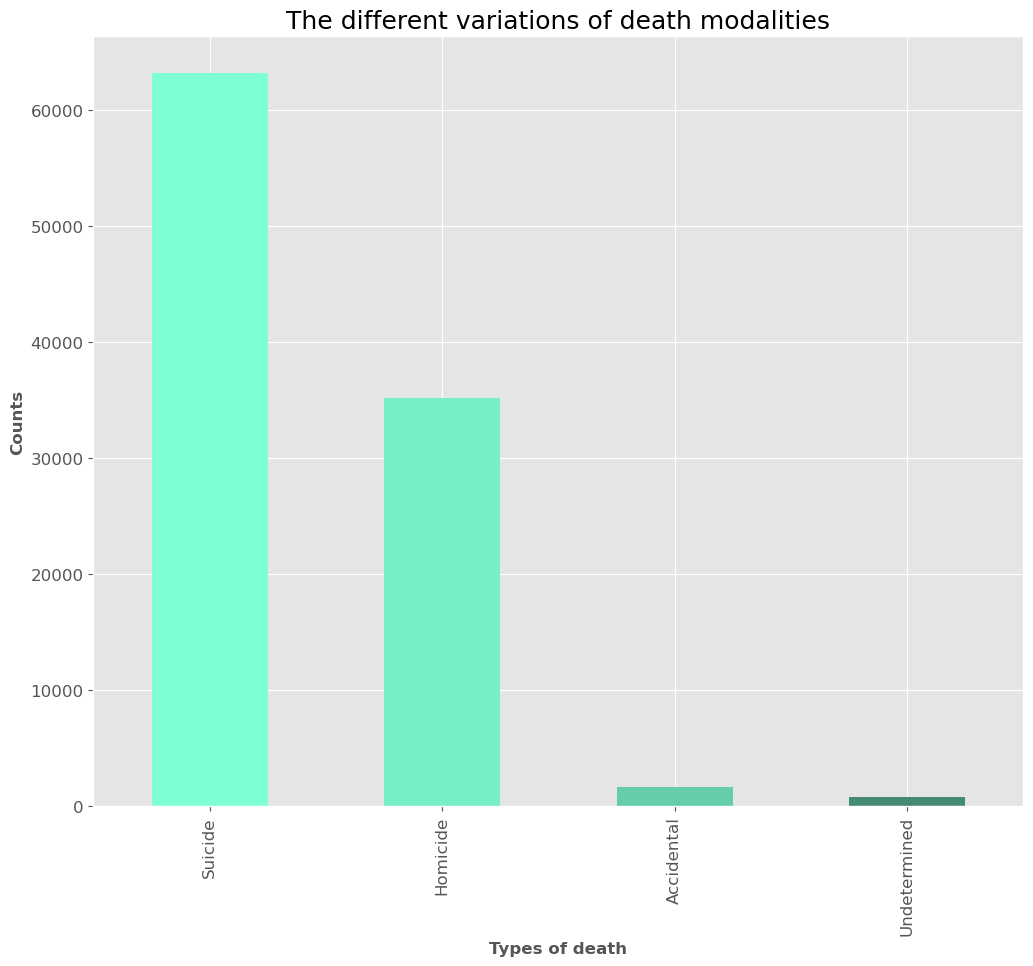

In [147]:
# Nearly two-thirds of gun deaths are *suicides*.
print(df['intent'].value_counts())

# getting the counts and separating the counts
df_size = len(df)
labels = df['intent'].unique()
counts = df['intent'].value_counts()
suicide = counts['Suicide']

# Print percentage
print("Total suicide percentage relative to gun related deaths: %.3f%%" % (suicide/df_size))

# matplotlib plot
# colors coming from https://www.webucator.com/article/python-color-constants-module/
df['intent'].value_counts().plot(kind="bar", color=['#7FFFD4', '#76EEC6', '#66CDAA', '#458B74'])

plt.xlabel('Types of death')
plt.ylabel('Counts')
plt.title('The different variations of death modalities')
plt.show()

# seaborn plot
#sns.barplot(x = labels, y = counts, data=df)


,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED
5,6,2012,2,Suicide,0,M,17.0,Native American/Native Alaskan,100,Home,Less than HS
7,8,2012,3,Suicide,0,M,41.0,Native American/Native Alaskan,100,Home,HS/GED
9,10,2012,2,Suicide,0,M,NaN,Black,998,Home,NaN
10,11,2012,2,Suicide,0,M,30.0,White,100,Home,Some college
11,12,2012,1,Suicide,0,M,21.0,Native American/Native Alaskan,100,Home,HS/GED


Male suicide percentage relative to suicide population: 0.862%


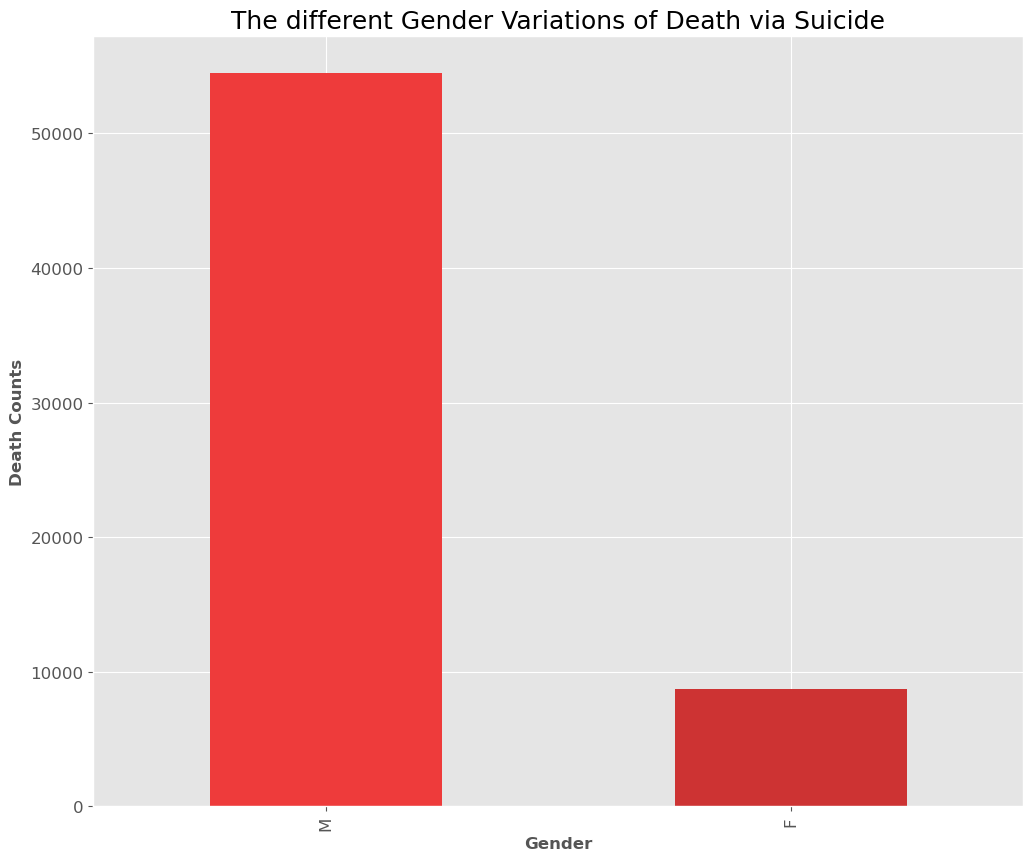

In [149]:
# - More than 85 percent of suicide victims are *male*.
# filter the dataframe to only get suicide victims
df_suicide = df[df['intent']=='Suicide']
display(df_suicide.head(10))

df_suicide_size = len(df_suicide)
counts = df_suicide['sex'].value_counts()
male_suicide = counts['M']
print("Male suicide percentage relative to suicide population: %.3f%%" % (male_suicide/df_suicide_size))

df_suicide['sex'].value_counts().plot(kind="bar", color=['#EE3B3B', '#CD3333'])

plt.xlabel('Gender')
plt.ylabel('Death Counts')
plt.title('The different Gender Variations of Death via Suicide')
plt.show()


Suicide         63175
Homicide        35176
Accidental       1639
Undetermined      807
Name: intent, dtype: int64
['Suicide' 'Undetermined' 'Accidental' 'Homicide']
Total homicide percentage relative to gun related deaths: 0.349%


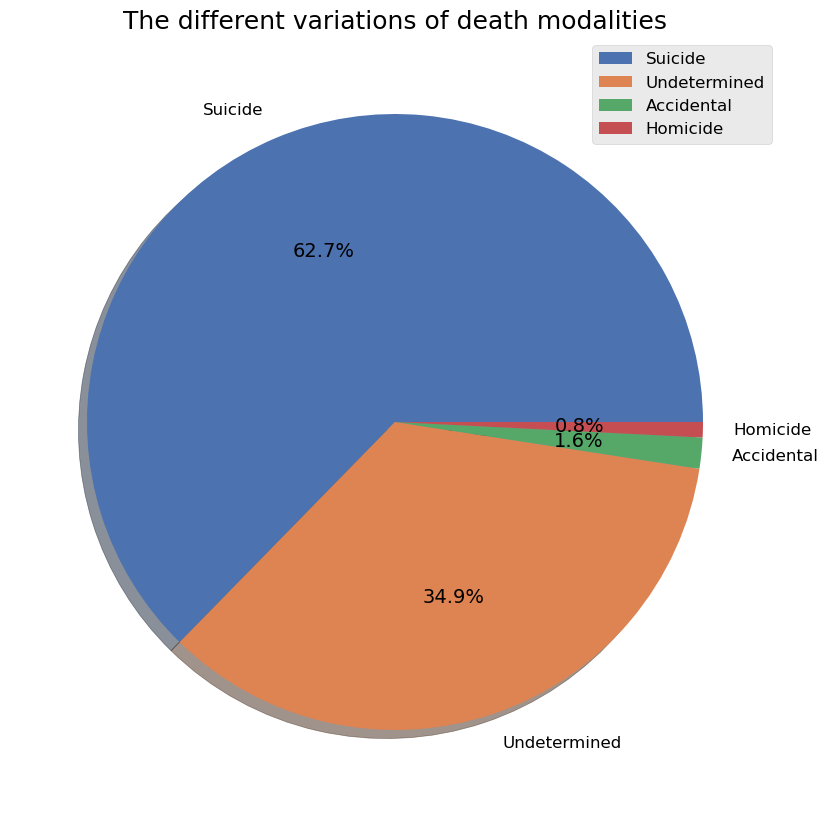

In [114]:
# - Around *a third* of all gun deaths are *homicides*.
print(df['intent'].value_counts())

# getting the counts and separating the counts
df_size = len(df)
labels = df['intent'].unique()
labels=labels[0:4]
counts = df['intent'].value_counts()
homicide = counts['Homicide']

# Print percentage
print("Total homicide percentage relative to gun related deaths: %.3f%%" % (homicide/df_size))

# matplotlib plot
# colors coming from https://www.webucator.com/article/python-color-constants-module/
colors = sns.color_palette('deep')[0:4]
plt.pie(counts, labels=labels, shadow = True,colors = colors, autopct='%1.1f%%')
plt.legend()
plt.title('The different variations of death modalities')
plt.show()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
14,15,2012,3,Homicide,0,M,27.0,White,100,Home,HS/GED
18,19,2012,3,Homicide,0,M,31.0,Asian/Pacific Islander,100,Home,Some college
41,42,2012,6,Homicide,0,M,26.0,Asian/Pacific Islander,100,Home,NaN
48,49,2012,6,Homicide,0,M,28.0,Native American/Native Alaskan,100,Home,Less than HS
59,60,2012,7,Homicide,0,M,19.0,Black,100,Home,HS/GED
61,62,2012,8,Homicide,1,M,28.0,White,100,NaN,HS/GED
83,84,2012,9,Homicide,1,M,34.0,White,100,NaN,HS/GED
92,93,2012,10,Homicide,1,M,24.0,Native American/Native Alaskan,100,NaN,Less than HS
97,98,2012,10,Homicide,0,M,27.0,White,100,Other specified,HS/GED
125,126,2012,12,Homicide,0,M,25.0,White,100,Home,Some college


Black                             12935
Hispanic                           3497
White                              2739
Asian/Pacific Islander              228
Native American/Native Alaskan      161
Name: race, dtype: int64
Female homicide percentage relative to homicide population: 0.661%


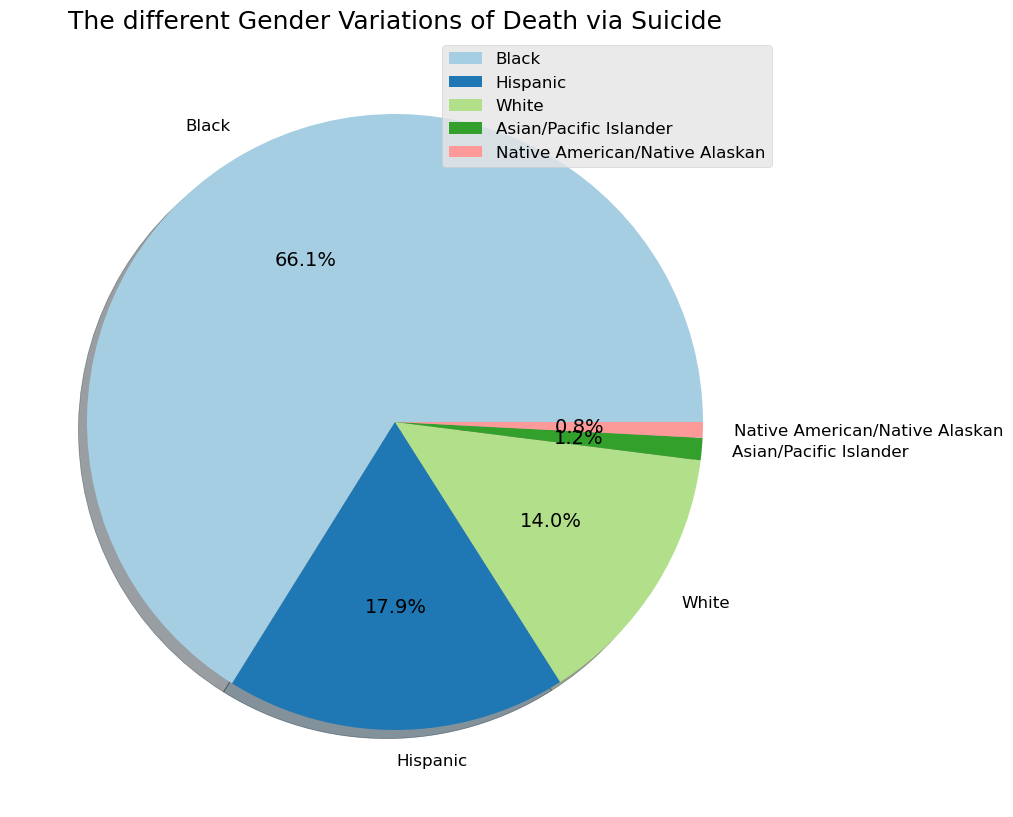

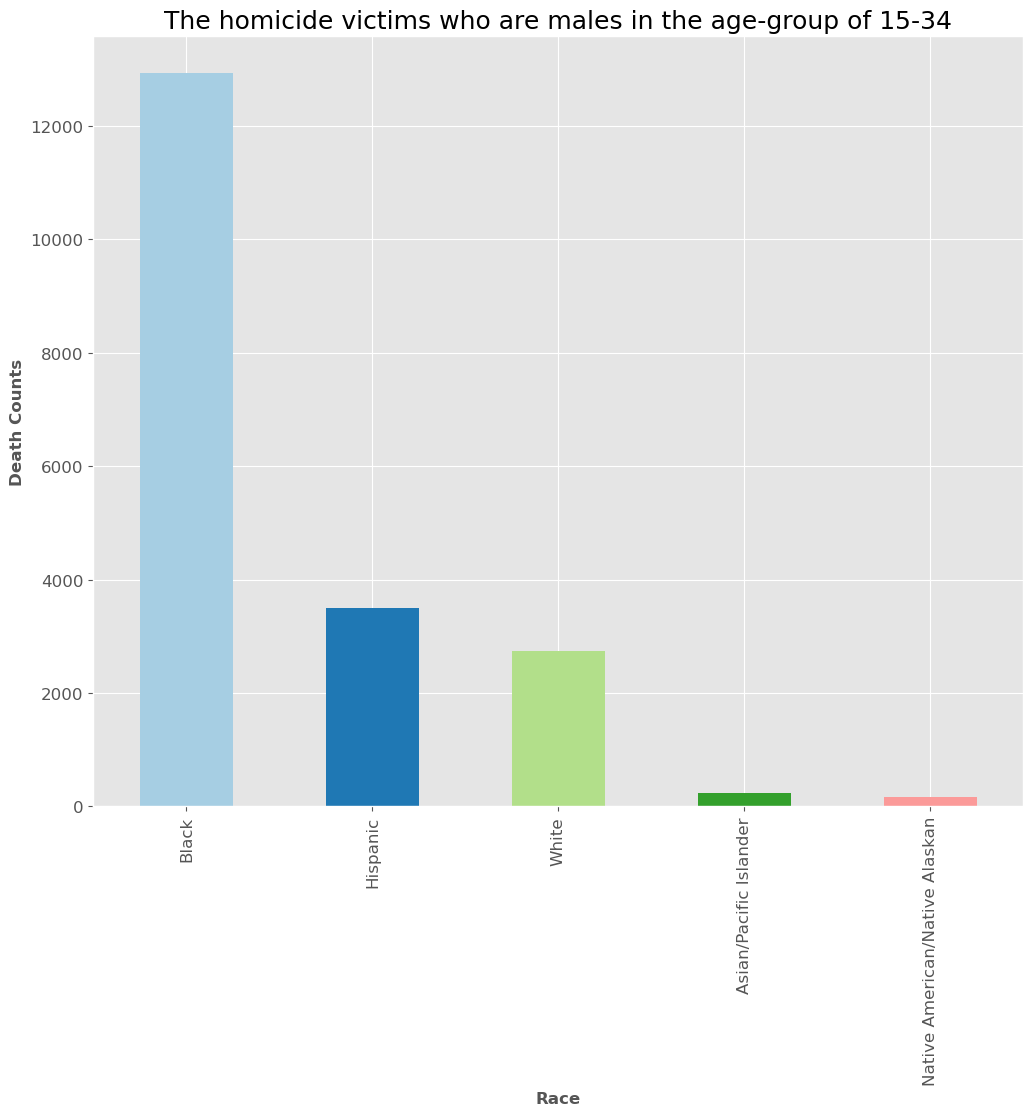

In [143]:
# Around *two-thirds* of homicide victims who are *males* in the *age-group of 15--34* are *black*.
df_homicide_filtered = df[(df['intent']=='Homicide') & (df['sex']=='M') & (df['age'].between(15, 34))]
display(df_homicide_filtered.head(10))

df_homicide_size = len(df_homicide_filtered)
counts = df_homicide_filtered['race'].value_counts()

print(counts)
labels = ['Black', 'Hispanic', 'White', 'Asian/Pacific Islander', 'Native American/Native Alaskan']
black_homicide = counts['Black']
print("Female homicide percentage relative to homicide population: %.3f%%" % (black_homicide/df_homicide_size))

colors = sns.color_palette('Paired')[0:5]
plt.pie(counts, labels=labels, shadow = True, colors =colors,  autopct='%1.1f%%')
plt.title('The different Gender Variations of Death via Suicide')
plt.legend()
plt.show()

df_homicide_filtered['race'].value_counts().plot(kind="bar", color=colors)
plt.xlabel('Race')
plt.ylabel('Death Counts')
plt.title('The homicide victims who are males in the age-group of 15-34')
plt.show()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
14,15,2012,3,Homicide,0,M,27.0,White,100,Home,HS/GED
18,19,2012,3,Homicide,0,M,31.0,Asian/Pacific Islander,100,Home,Some college
22,23,2012,4,Homicide,0,F,47.0,Black,100,Home,HS/GED
24,25,2012,4,Homicide,0,M,51.0,White,100,Other specified,HS/GED
25,26,2012,4,Homicide,0,M,41.0,White,100,Other specified,HS/GED
29,30,2012,4,Homicide,0,M,43.0,White,100,Other specified,HS/GED
34,35,2012,4,Homicide,0,F,25.0,White,100,Home,HS/GED
41,42,2012,6,Homicide,0,M,26.0,Asian/Pacific Islander,100,Home,NaN
47,48,2012,7,Homicide,0,M,59.0,White,100,Home,HS/GED
48,49,2012,6,Homicide,0,M,28.0,Native American/Native Alaskan,100,Home,Less than HS


Female homicide percentage relative to homicide population: 0.153%


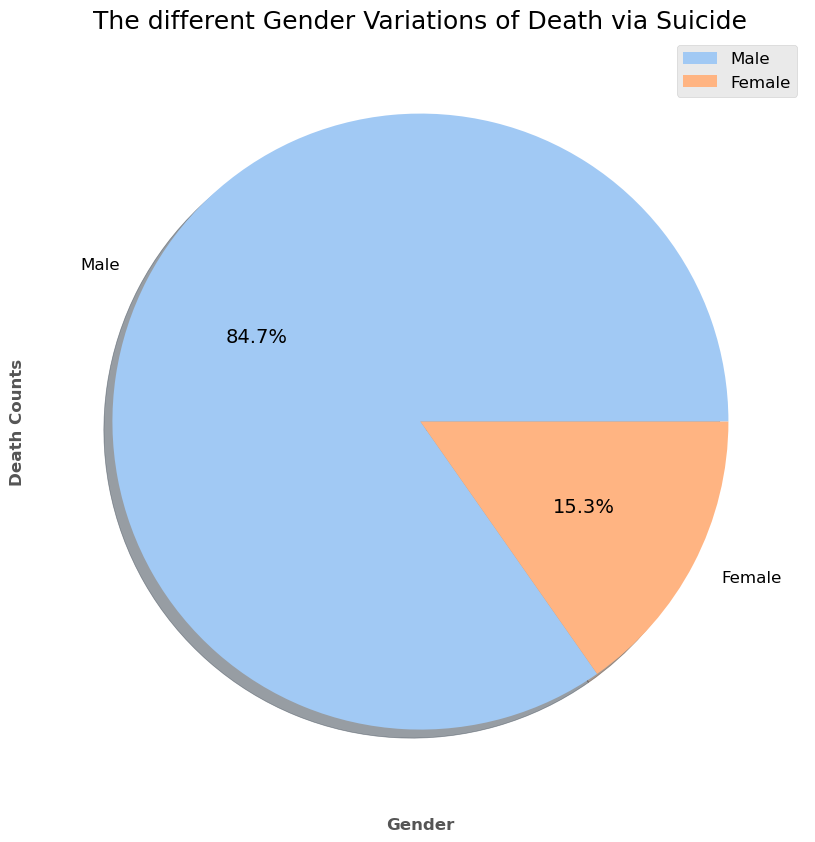

In [142]:
# - *Women* constitue only *15 percent* of the total *homicide* victims.
# filter the dataframe to only get suicide victims
df_homicide = df[df['intent']=='Homicide']
display(df_homicide.head(10))

df_homicide_size = len(df_homicide)
counts = df_homicide['sex'].value_counts()
labels = ['Male', 'Female']
female_homicide = counts['F']
print("Female homicide percentage relative to homicide population: %.3f%%" % (female_homicide/df_homicide_size))

colors = sns.color_palette('pastel')[0:2]
plt.pie(counts, labels=labels, shadow = True, colors =colors,  autopct='%1.1f%%')
plt.xlabel('Gender')
plt.ylabel('Death Counts')
plt.title('The different Gender Variations of Death via Suicide')
plt.legend()
plt.show()